In [73]:
#Import packages and read the CSV file data set that we are using. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("100 Greatest Movies.csv")

In [74]:
#Which decade produced the most top 100 films?  
#Create conditions for year to be categorized in the corresponding decade. 
conditions = [
    (df['Release Year'] <= 1939),
    (df['Release Year'] >= 1940) & (df['Release Year'] <1950),
    (df['Release Year'] >= 1950) & (df['Release Year'] <1960),
    (df['Release Year'] >= 1960) & (df['Release Year'] <1970),
    (df['Release Year'] >= 1970) & (df['Release Year'] <1980),
    (df['Release Year'] >= 1980) & (df['Release Year'] <1990),
    (df['Release Year'] >= 1990) & (df['Release Year'] <2000),
    (df['Release Year'] >= 2000)
    ]

# create a list of the values we want to assign for each condition
values = ['30s', '40s', '50s', '60s','70s','80s','90s','2000s']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Decade'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Ranking,Film Title,Release Year,Audience Rating,Runtime,Genre,Decade
0,1,The Godfather,1972,R,175 min,"Crime, Drama",70s
1,2,The Shawshank Redemption,1994,R,142 min,Drama,90s
2,3,Schindler's List,1993,R,195 min,"Biography, Drama, History",90s
3,4,Raging Bull,1980,R,129 min,"Biography, Drama, Sport",80s
4,5,Casablanca,1942,PG,102 min,"Drama, Romance, War",40s


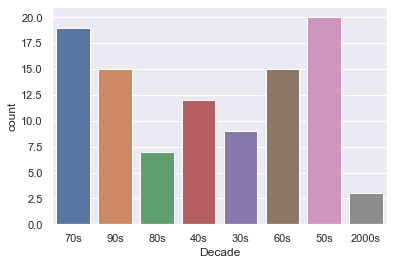

In [75]:
#Import package required to use the countplot. 
import seaborn as sns
sns.set_theme(style="darkgrid")
#This will generate a bar chart that gives us the count as the Y axis, decade as X axis.  
ax = sns.countplot(x="Decade", data=df)
#Download copy of bar chart.
plt.savefig('pieChartDecades.png')


In [76]:
#Convert all of the text in Film Title column of our dataframe into its own list and join. 
wordlist = df['Film Title'].tolist()
allwords =" ".join(wordlist)



In [77]:

conda install -c conda-forge wordcloud


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


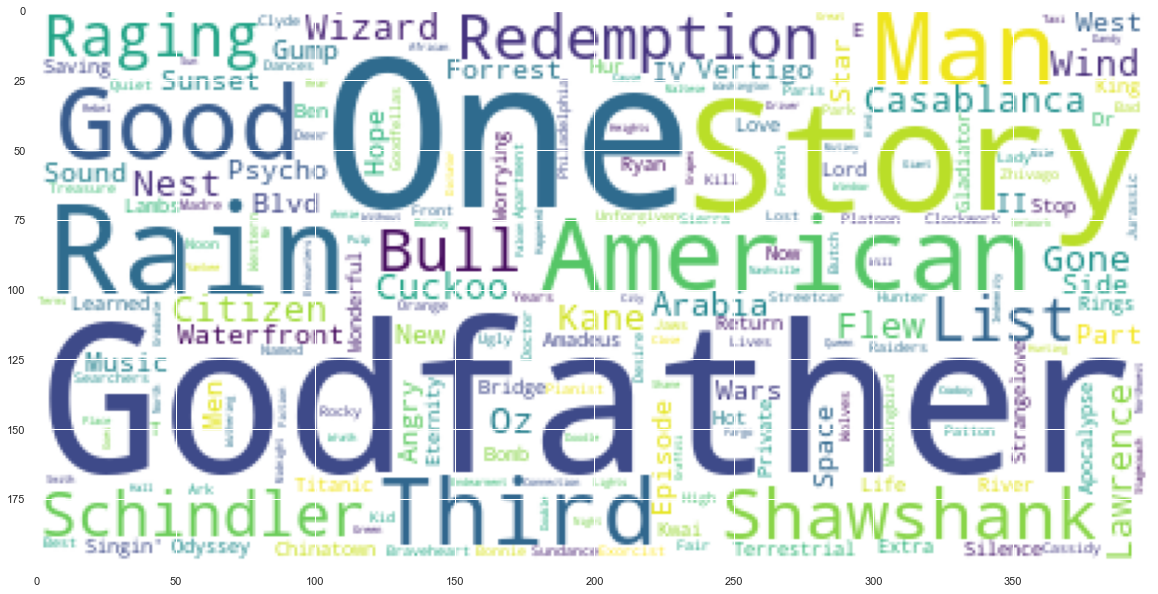

In [78]:
#Import WordCloud and create it using allwords
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color="white").generate(allwords))

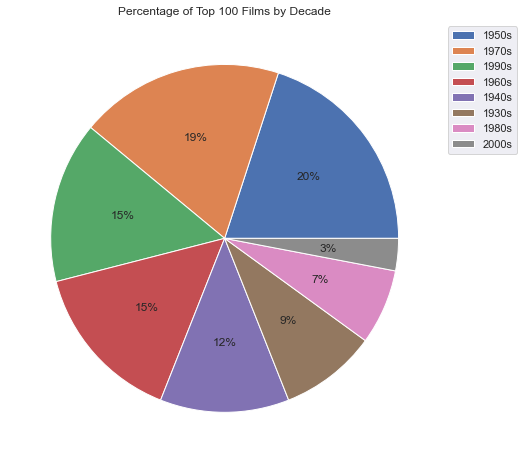

In [79]:

#Size the piechart
fig = plt.figure(figsize=(8,8))
#Use the column Decade from our data frame to populate our piechart. 
plt.pie(x=(df['Decade'].value_counts()),autopct='%1.f%%')
#Create the legend for our chart.
plt.legend(bbox_to_anchor=(1, 1), labels=('1950s','1970s','1990s','1960s','1940s','1930s','1980s','2000s'));
#Create the title for our piechart.
plt.title("Percentage of Top 100 Films by Decade")
#Save the piechart to computer. 
plt.savefig('pieDecade.png')

In [80]:
#Compare audience ratings over the years per genre, what can you gather from these observations? 
#Dropping unnecessary values to focus on Release year, Audience Rating, & Genre.
#Dropping Film Title 
df=df.drop(['Film Title'], axis =1)

In [81]:
#Dropping Runtime
df=df.drop(['Runtime'], axis =1)

In [82]:
#Dropping Ranking
df=df.drop(['Ranking'], axis =1)

In [83]:
#Cleaned up the column by leaving the primary genre up and deleting sub genres.
df.Genre = df.Genre.str.replace("(,).*","")

In [84]:
#Looking at what we have so far. 
df.head(10)


,Release Year,Audience Rating,Genre,Decade
0,1972,R,Crime,70s
1,1994,R,Drama,90s
2,1993,R,Biography,90s
3,1980,R,Biography,80s
4,1942,PG,Drama,40s
5,1941,PG,Drama,40s
6,1939,Passed,Drama,30s
7,1939,PG,Adventure,30s
8,1975,R,Drama,70s
9,1962,Approved,Adventure,60s


In [85]:
#Here we are generating a chart which shows the Audience Rating film count per Decade. If there is none then we put a 0.0
df2 = df.groupby('Audience Rating')['Decade'].value_counts().unstack().fillna(0)
#We are also adding a total column on the far right side
total = list(df2.sum(axis=1))
df2['total'] = total
df2

Decade,2000s,30s,40s,50s,60s,70s,80s,90s,total
Audience Rating,,,,,,,,,
Approved,0.0,1.0,2.0,3.0,4.0,0.0,0.0,0.0,10.0
G,0.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,7.0
GP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Not Rated,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
PG,0.0,1.0,3.0,6.0,3.0,6.0,3.0,0.0,22.0
PG-13,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,7.0
Passed,0.0,5.0,6.0,6.0,0.0,0.0,0.0,0.0,17.0
R,2.0,0.0,0.0,0.0,4.0,12.0,4.0,11.0,33.0


In [86]:
#The data was grouped the following way to display Genre over the years.
df4 = df.groupby('Genre')['Decade'].value_counts().unstack().fillna(0)
df4.loc['Total']= df4.sum()
#We are also adding a total column on the far right side
total = list(df4.sum(axis=1))
df4['total'] = total
df4

Decade,2000s,30s,40s,50s,60s,70s,80s,90s,total
Genre,,,,,,,,,
Action,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,7.0
Adventure,0.0,3.0,1.0,5.0,2.0,1.0,0.0,1.0,13.0
Biography,1.0,0.0,1.0,0.0,2.0,1.0,2.0,3.0,10.0
Comedy,0.0,3.0,2.0,2.0,3.0,3.0,1.0,0.0,14.0
Crime,0.0,0.0,2.0,2.0,2.0,4.0,0.0,4.0,14.0
Drama,0.0,3.0,5.0,9.0,3.0,7.0,2.0,6.0,35.0
Family,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
Film-Noir,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Horror,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0


In [87]:
#The data was grouped the following way to display Genre across Audience Ratings
df3 = df.groupby('Genre')['Audience Rating'].value_counts().unstack().fillna(0)
df3.loc['Total']= df3.sum()
total = list(df3.sum(axis=1))
df3['total'] = total
df3

Audience Rating,Approved,G,GP,Not Rated,PG,PG-13,Passed,R,total
Genre,,,,,,,,,
Action,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,7.0
Adventure,2.0,2.0,0.0,0.0,4.0,1.0,4.0,0.0,13.0
Biography,0.0,1.0,1.0,0.0,1.0,0.0,1.0,6.0,10.0
Comedy,2.0,2.0,0.0,1.0,5.0,0.0,3.0,1.0,14.0
Crime,4.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,14.0
Drama,1.0,2.0,0.0,2.0,7.0,4.0,7.0,12.0,35.0
Family,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Film-Noir,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Horror,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [88]:
#Based on this dataset, what 10 films had the longest runtime and what can you gather from these 10 observations? 
#Reimport the original CSV because we are going to use different python methods on it.
movies=pd.read_csv("100 Greatest Movies.csv")

In [89]:
#Removing the unnecessary columns
movies = movies.drop(['Audience Rating', 'Genre'], axis = 1)


In [91]:
#Take out the "min" from the Runtime column and change to float so that it will sort correctly
movies["Runtime"] = movies["Runtime"].str.replace('min','')
movies.Runtime = movies.Runtime.astype(float)
movies


,Ranking,Film Title,Release Year,Runtime
0,1,The Godfather,1972,175.0
1,2,The Shawshank Redemption,1994,142.0
2,3,Schindler's List,1993,195.0
3,4,Raging Bull,1980,129.0
4,5,Casablanca,1942,102.0
...,...,...,...,...
95,96,Rear Window,1954,112.0
96,97,The Third Man,1949,93.0
97,98,Rebel Without a Cause,1955,111.0
98,99,North by Northwest,1959,136.0


In [92]:
#use sort_values to display 10 longest runtimes
moviesTop10 = movies.sort_values(by=['Runtime'], ascending=False).head(10)
moviesTop10

,Ranking,Film Title,Release Year,Runtime
6,7,Gone with the Wind,1939,238.0
9,10,Lawrence of Arabia,1962,228.0
29,30,Ben-Hur,1959,212.0
12,13,The Godfather: Part II,1974,202.0
75,76,Giant,1956,201.0
32,33,The Lord of the Rings: The Return of the King,2003,201.0
47,48,Doctor Zhivago,1965,197.0
2,3,Schindler's List,1993,195.0
34,35,Titanic,1997,194.0
78,79,The Green Mile,1999,189.0


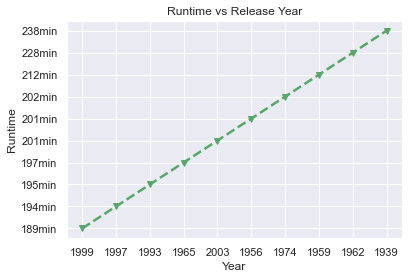

In [93]:
#Comparing movie released year and movie runtime via a graph
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 
plt.plot(x, y, marker = 'v', linestyle = 'dashed', linewidth = '2.5',color = 'g')#chage the marker to 'v', change solid line to dashed line, increase the width, change the color
plt.title('Runtime vs Release Year')
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],['1999', '1997', '1993', '1965', '2003', '1956', '1974', '1959', '1962', '1939'])#set the x axis labels with xticks function
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],['189min', '194min', '195min', '197min', '201min', '201min', '202min', '212min', '228min', '238min'])

plt.grid(True)#code if you want to show the gridlines
